In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [5]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [6]:
data['parental level of education'].replace(['some high school'],['high school'],inplace = True)
data['parental level of education'].replace(['some college'],['college'],inplace = True)

In [7]:
data.drop(axis=1, columns = 'race/ethnicity', inplace = True)
data.drop(axis=1, columns = 'lunch', inplace = True)

In [8]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [9]:
data1 = data[['parental level of education','gender','math score','reading score','writing score']]
data1.groupby('parental level of education').max()

,gender,math score,reading score,writing score
parental level of education,,,,
associate's degree,male,100,100,100
bachelor's degree,male,100,100,100
college,male,100,100,99
high school,male,99,100,100
master's degree,male,95,100,100


In [10]:
data1.groupby('gender').max()

,parental level of education,math score,reading score,writing score
gender,,,,
female,master's degree,100,100,100
male,master's degree,100,100,100


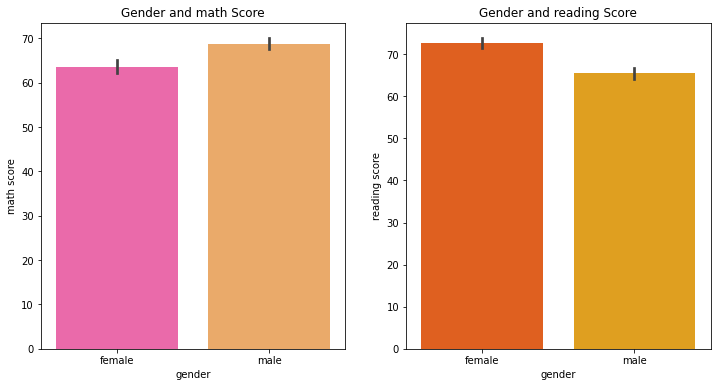

In [11]:
# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1,2,1)
sns.barplot(x='gender', y='math score', data=data1, estimator= np.mean, palette='spring')
plt.title("Gender and math Score")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='reading score', data=data1, estimator=np.mean,palette='autumn')
plt.title("Gender and reading Score")
plt.show()


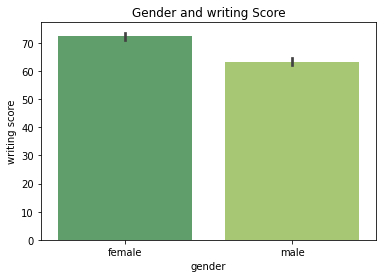

In [12]:
# bar plot with default statistic=mean
sns.barplot(x='gender', y='writing score', data=data1,estimator=np.mean,palette='summer')
plt.title("Gender and writing Score")
plt.show()

In [40]:
# grp = data.groupby('gender')
# y= grp['math score'].mean()
# z= grp['writing score']
# d=grp['reading score']
# plt.plot(grp, y, 'ro-')
# plt.show()

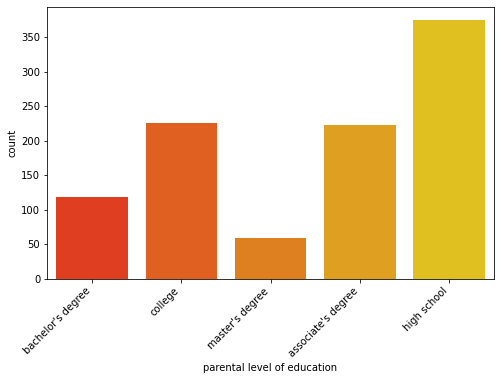

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='parental level of education',data =data, palette='autumn')
plt.xticks(rotation = 45,ha='right')
plt.show()

In [14]:
data2 = data[['test preparation course','math score','reading score','writing score']]
data2.groupby('test preparation course').sum()

,math score,reading score,writing score
test preparation course,,,
completed,24951,26454,26642
none,41138,42715,41412


In [15]:
#sorting based on possible determinant
data1.sort_values(by=['math score','reading score','writing score'],ascending=False).head()

,parental level of education,gender,math score,reading score,writing score
458,bachelor's degree,female,100,100,100
916,bachelor's degree,male,100,100,100
962,associate's degree,female,100,100,100
149,associate's degree,male,100,100,93
625,college,male,100,97,99


In [16]:
data.groupby('parental level of education')['gender'].value_counts()

parental level of education  gender
associate's degree           female    116
                             male      106
bachelor's degree            female     63
                             male       55
college                      female    118
                             male      108
high school                  male      190
                             female    185
master's degree              female     36
                             male       23
Name: gender, dtype: int64

In [30]:
low_result = data1[data1['math score']<=49][data1['reading score']<=49][data1['writing score']<=49]
low_result

<ipython-input-30-5c10b3f7661b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_result = data1[data1['math score']<=49][data1['reading score']<=49][data1['writing score']<=49]
<ipython-input-30-5c10b3f7661b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_result = data1[data1['math score']<=49][data1['reading score']<=49][data1['writing score']<=49]


,parental level of education,gender,math score,reading score,writing score
7,college,male,40,43,39
17,high school,female,18,32,28
18,master's degree,male,46,42,46
33,college,male,40,42,38
55,high school,female,33,41,43
59,high school,female,0,17,10
61,high school,male,39,39,34
66,high school,male,45,37,37
74,high school,male,49,49,41
75,associate's degree,male,44,41,38


In [19]:
average_result=data1[(data1['math score']>=50)&(data1['math score']==69)],data1[(data1['reading score']>=50)&(data1['reading score']==69)],data1[(data1['writing score']>=50)&(data1['writing score']==69)]
average_result

(    parental level of education  gender  math score  reading score  \
 1                       college  female          69             90   
 15                  high school  female          69             75   
 23                  high school  female          69             73   
 26                      college    male          69             54   
 30                      college  female          69             74   
 63           associate's degree  female          69             80   
 194             master's degree  female          69             84   
 202          associate's degree    male          69             77   
 267                 high school  female          69             72   
 270           bachelor's degree    male          69             63   
 305                     college    male          69             67   
 342                 high school  female          69             76   
 366                 high school    male          69             58   
 427  

In [33]:
high_result = data1[data1['math score']>=70][data1['reading score']>=70][data1['writing score']>=70]

<ipython-input-33-5137aab183a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_result = data1[data1['math score']>=70][data1['reading score']>=70][data1['writing score']>=70]
<ipython-input-33-5137aab183a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_result = data1[data1['math score']>=70][data1['reading score']>=70][data1['writing score']>=70]


In [35]:
high_result

,parental level of education,gender,math score,reading score,writing score
0,bachelor's degree,female,72,72,74
2,master's degree,female,90,95,93
4,college,male,76,78,75
5,associate's degree,female,71,83,78
6,college,female,88,95,92
...,...,...,...,...,...
984,high school,female,74,75,82
987,high school,male,81,75,76
990,high school,male,86,81,75
995,master's degree,female,88,99,95


In [50]:
high_result2 = data1[data1['math score']==100][data1['reading score']==100][data1['writing score']==100]
high_result2

<ipython-input-50-e6c29a46bce5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_result2 = data1[data1['math score']==100][data1['reading score']==100][data1['writing score']==100]
<ipython-input-50-e6c29a46bce5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_result2 = data1[data1['math score']==100][data1['reading score']==100][data1['writing score']==100]


,parental level of education,gender,math score,reading score,writing score
458,bachelor's degree,female,100,100,100
916,bachelor's degree,male,100,100,100
962,associate's degree,female,100,100,100


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

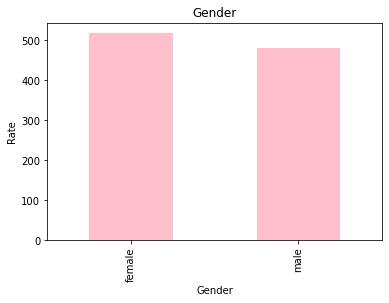

In [26]:
data1['gender'].value_counts().plot(kind='bar',color='pink')
plt.title('Gender')
plt.ylabel('Rate')
plt.xlabel('Gender')
sns.despine